In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

In [45]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import cv2
from IPython.display import Image, display
from PIL import Image
from sklearn.model_selection import train_test_split

In [46]:
with_masked_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
without_masked_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(with_masked_files[:5])
print(without_masked_files[:5])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']


In [47]:
len(with_masked_files), len(without_masked_files)

(3725, 3828)

In [48]:
#creating labels
#mask  = 1
#no mask = 0

with_masked_labels = [1]*len(with_masked_files)
without_masked_labels = [0]*len(without_masked_files)

with_masked_labels[:5]

[1, 1, 1, 1, 1]

In [49]:
labels = with_masked_labels + without_masked_labels

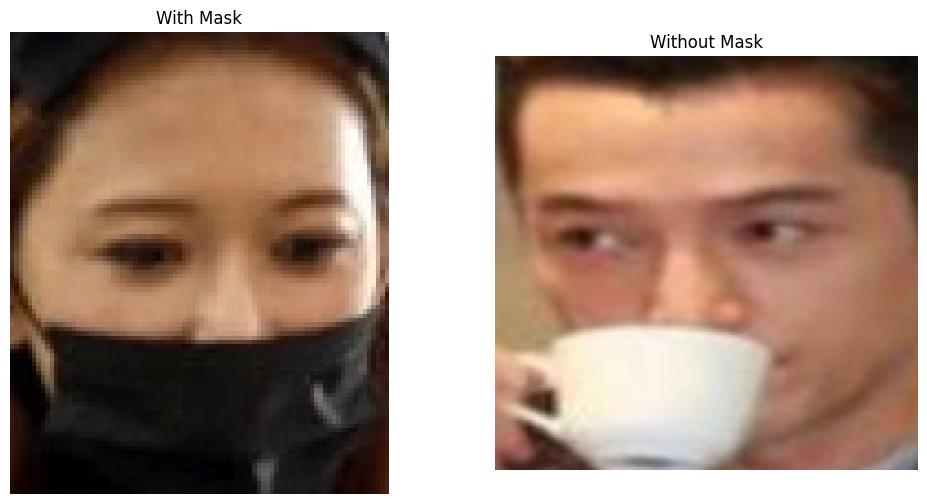

In [50]:
#displaying the image
# Load images
img1 = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_100.jpg')
img2 = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1002.jpg')

# Create subplots to display images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Display the first image
axes[0].imshow(img1)
axes[0].axis('off')  # Hide axes
axes[0].set_title('With Mask')  # Title for the first image

# Display the second image
axes[1].imshow(img2)
axes[1].axis('off')  # Hide axes
axes[1].set_title('Without Mask')  # Title for the second image

# Show the plot
plt.show()

In [51]:
#resize the image
with_masked_path = '/kaggle/input/face-mask-dataset/data/with_mask/'
without_masked_path = '/kaggle/input/face-mask-dataset/data/without_mask/'

data = []

# Resize images with masks
for img_file in os.listdir(with_masked_path):
    image = Image.open(os.path.join(with_masked_path, img_file))  # Use os.path.join to construct the full path
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Resize images without masks
for img_file in os.listdir(without_masked_path):
    image = Image.open(os.path.join(without_masked_path, img_file))  # Use os.path.join for the full path
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [52]:
len(data)

7553

In [53]:
data[0].shape

(128, 128, 3)

In [54]:
X = np.array(data)
y = np.array(labels)

In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [56]:
#Scaling
Xtrain_ss = Xtrain/255
Xtest_ss = Xtest/255

Xtrain_ss[0]

array([[[0.10980392, 0.10588235, 0.09019608],
        [0.10980392, 0.10588235, 0.09019608],
        [0.10980392, 0.10588235, 0.09019608],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ]],

       [[0.11764706, 0.11372549, 0.09803922],
        [0.11764706, 0.11372549, 0.09803922],
        [0.11764706, 0.11372549, 0.09803922],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ]],

       [[0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        ...,
        [0.17254902, 0.17254902, 0.14117647],
        [0.17254902, 0.17254902, 0.14117647],
        [0.17254902, 0.17254902, 0.14117647]],

       ...,

       [[0.28627451, 0.16078431, 0.05490196],
        [0.2745098 , 0.15686275, 0.05882353],
        [0.23921569, 0

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [58]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [59]:
class CNNModel(nn.Module):
    def __init__(self,num_classes = 2):
        super(CNNModel,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3,3))
        self.pool = nn.MaxPool2d(kernel_size = (2,2))
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3,3))
        
        #fully connected
        self.fc1 = nn.Linear(64*30*30,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,num_classes)
        
        #dropout
        self.dropout = nn.Dropout(0.5)
        
    def forward(self,x):
        out = self.pool(F.relu(self.conv1(x)))
        out = self.pool(F.relu(self.conv2(out)))
        out = out.view(-1,64*30*30)
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        out = F.relu(self.fc2(out))
        out = self.dropout(out)
        out = torch.sigmoid(self.fc3(out))
        return out

In [60]:
model = CNNModel(num_classes = 2).to(device)

In [61]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [62]:
Xtrain_tensor = torch.tensor(Xtrain_ss, dtype = torch.float32).permute(0,3,1,2)
ytrain_tensor = torch.tensor(ytrain,dtype = torch.long)

Xtest_tensor = torch.tensor(Xtest_ss, dtype = torch.float32).permute(0,3,1,2)
ytest_tensor = torch.tensor(ytest,dtype = torch.long)

In [63]:
num_epochs = 20
batch_size = 32

In [64]:
#create a dataloader for batch processing
from torch.utils.data import DataLoader, TensorDataset

#create a dataset and dataloader
train_dataset = TensorDataset(Xtrain_tensor, ytrain_tensor)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

In [65]:
test_dataset = TensorDataset(Xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [66]:
#Train loop
losses = []
accuracies = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs,labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+= loss.item()*inputs.size(0)
        _,predicted = torch.max(outputs.data,1)
        total +=labels.size(0)
        correct +=(predicted==labels).sum().item()
        
    epoch_loss = running_loss/len(train_loader.dataset)
    epoch_acc = correct/total
    losses.append(epoch_loss)
    accuracies.append(epoch_acc)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

Epoch [1/20], Loss: 0.4906, Accuracy: 0.8136
Epoch [2/20], Loss: 0.4340, Accuracy: 0.8736
Epoch [3/20], Loss: 0.4241, Accuracy: 0.8846
Epoch [4/20], Loss: 0.4156, Accuracy: 0.8954
Epoch [5/20], Loss: 0.4103, Accuracy: 0.8987
Epoch [6/20], Loss: 0.3991, Accuracy: 0.9116
Epoch [7/20], Loss: 0.3942, Accuracy: 0.9153
Epoch [8/20], Loss: 0.3965, Accuracy: 0.9143
Epoch [9/20], Loss: 0.3856, Accuracy: 0.9245
Epoch [10/20], Loss: 0.3788, Accuracy: 0.9330
Epoch [11/20], Loss: 0.3748, Accuracy: 0.9371
Epoch [12/20], Loss: 0.3722, Accuracy: 0.9389
Epoch [13/20], Loss: 0.3675, Accuracy: 0.9441
Epoch [14/20], Loss: 0.3641, Accuracy: 0.9484
Epoch [15/20], Loss: 0.3616, Accuracy: 0.9505
Epoch [16/20], Loss: 0.3607, Accuracy: 0.9517
Epoch [17/20], Loss: 0.3583, Accuracy: 0.9543
Epoch [18/20], Loss: 0.3623, Accuracy: 0.9503
Epoch [19/20], Loss: 0.3561, Accuracy: 0.9555
Epoch [20/20], Loss: 0.3601, Accuracy: 0.9528


In [67]:
losses

[0.49064410399696123,
 0.4340380553140107,
 0.42414528623751085,
 0.4155810319481603,
 0.4103411960211151,
 0.3990683254225686,
 0.39417574790209897,
 0.3964539103084193,
 0.38558049912840986,
 0.378828265391924,
 0.37480378507068324,
 0.3721911007996546,
 0.3675199312628677,
 0.3640914299617497,
 0.3616168076965991,
 0.3606950445153073,
 0.3582767447329088,
 0.3623284649095248,
 0.3560971116356722,
 0.36010102172515046]

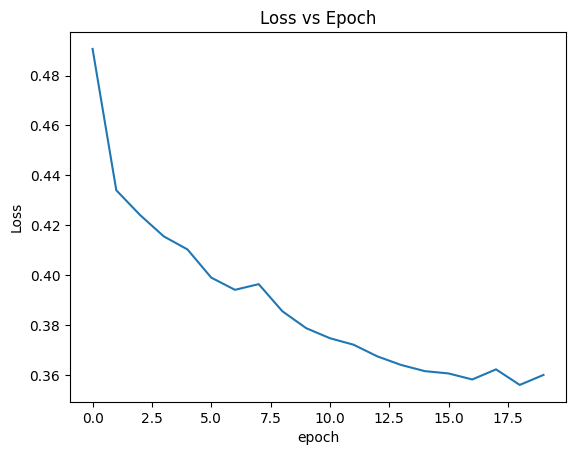

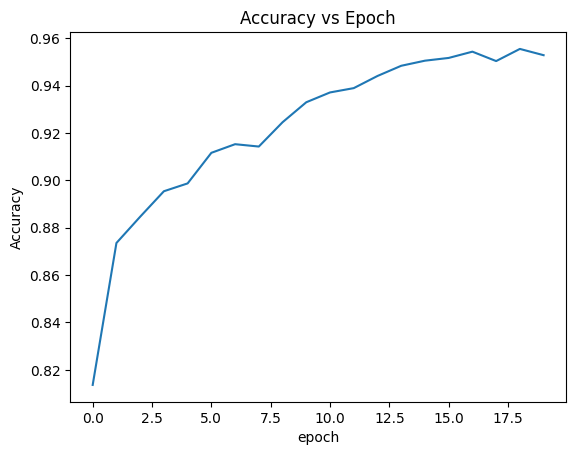

In [70]:
plt.plot(range(num_epochs),losses)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()


plt.plot(range(num_epochs), accuracies)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.show()

In [71]:
#test data
model.eval()
total_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for inputs,labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        
        loss = criterion(outputs,labels)
        total_loss +=loss.item()*inputs.size(0)
        
        
        _, predicted = torch.max(outputs.data,1)
        total +=labels.size(0)
        correct+=(predicted==labels).sum().item()
        
avg_loss = total_loss/len(test_loader.dataset)
accuracy = correct/total

print(avg_loss,accuracy)

0.38079710429981795 0.928524156187955


In [77]:
from PIL import Image
import numpy as np
import torch

# Get the path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Load and display the image using PIL
input_image = Image.open(input_image_path)
input_image.show()

# Resize the image
input_image_resized = input_image.resize((128, 128))

# Convert the image to a NumPy array and scale the pixel values
input_image_scaled = np.array(input_image_resized) / 255.0

# Reshape the image for model input
input_image_reshaped = np.reshape(input_image_scaled, (1, 3, 128, 128))  # Change to (1, C, H, W)

# Convert to PyTorch tensor and move to device
input_image_tensor = torch.tensor(input_image_reshaped, dtype=torch.float32).to(device)

# Set the model to evaluation mode
model.eval()

# Disable gradient calculations
with torch.no_grad():
    # Make predictions
    input_prediction = model(input_image_tensor)

# Get the predicted label
input_pred_label = torch.argmax(input_prediction, dim=1).item()  # Get the predicted class index

# Output the prediction result
if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


Path of the image to be predicted:  /kaggle/input/face-mask-dataset/data/with_mask/with_mask_1011.jpg


The person in the image is wearing a mask


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpjoagxty7.PNG'
